# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Nama - NIM

<b>Url presentasi</b>
http://

Fungsi yang dikerjakan

Tulis fungsi di sini 
- F16 = `4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4`

Range yang digunakan
- [-0.7, 0.7]

Algoritma yang digunakan
- Firefly
- RAO3



In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def eval(x1, x2):
    f16 = 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4
    return f16
    

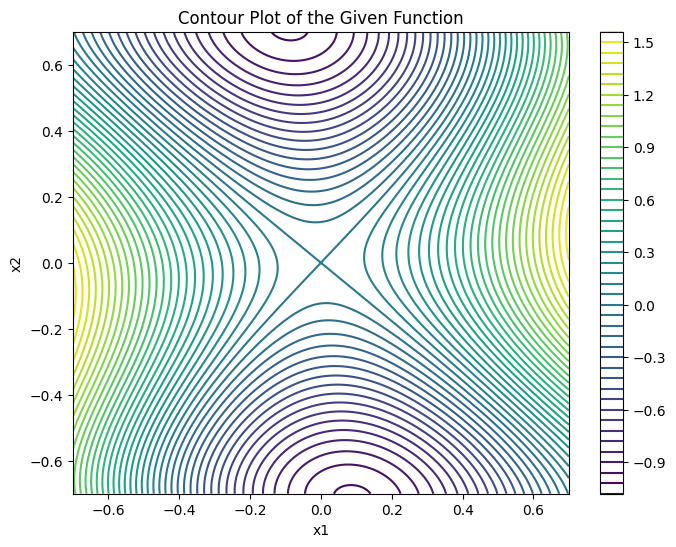

In [4]:
x1 = np.linspace(-0.7, 0.7, 400)   
x2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = eval(X1, X2)

plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of the Given Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Latar Belakang algoritma 1
Algoritma Firefly adalah salah satu metode optimasi berbasis populasi yang terinspirasi dari perilaku alami dari kunang kunang. Algoritma Firefly bekerja sebagai berikut:

- Inisialisasi: Algoritma ini dimulai dengan inisialisasi sejumlah kunang-kunang secara acak dalam sebuah tempat pencarian. Setiap kunang-kunang ini memiliki posisi yang merepresentasikan sebuah solusi potensial dalam tempat pencarian, dan setiap posisi memiliki nilai kecerahan yang terkait dengan kualitas solusi tersebut (biasanya kecerahan berbanding terbalik dengan nilai fungsi tujuan).

- Kecerahan atau Atraktivitas: Kecerahan kunang-kunang dianggap proporsional terhadap nilai kecocokan atau fitness dari solusi yang direpresentasikannya. Kecerahan ini juga menentukan daya tarik kunang-kunang tersebut terhadap kunang-kunang lain. Dalam konteks optimasi, kunang-kunang yang lebih terang memiliki solusi yang lebih baik dan lebih menarik bagi yang lain.

- Pergerakan Kunang-Kunang: Kunang-kunang yang kurang terang akan bergerak menuju kunang-kunang yang lebih terang berdasarkan daya tariknya, yang biasanya berkurang dengan bertambahnya jarak antar kunang-kunang. Gerakan ini dihitung menggunakan rumus khusus yang menggabungkan atraksi dan komponen pergerakan acak.

- Pembaruan Posisi: Posisi setiap kunang-kunang diperbarui berdasarkan atraksinya kepada kunang-kunang lain yang lebih terang. Rumusnya bisa mencakup komponen eksplorasi acak, yang biasanya diimplementasikan sebagai variabel yang mengikuti distribusi normal atau seragam.

- Iterasi: Langkah-langkah di atas diulang untuk sejumlah iterasi yang ditentukan atau sampai kriteria berhenti terpenuhi (seperti konvergensi pada solusi atau mencapai batas maksimum iterasi).

- Evaluasi Solusi: Pada akhir iterasi, solusi terbaik yang ditemukan oleh kunang-kunang (yaitu, posisi kunang-kunang dengan kecerahan tertinggi) akan diambil sebagai solusi optimal.

In [5]:
# Algoritma 1
def firefly_algorithm(max_iter, n, alpha, beta_init, gamma):
    # Buat inisialisasi
    fireflies = np.random.uniform(-0.7, 0.7, (n, 2))
    fitness = np.array([eval(f[0], f[1]) for f in fireflies])
    history = [fireflies.copy()]
    
    # Inisialisi best solution
    best_fitness = np.min(fitness)
    best_position = fireflies[np.argmin(fitness)].copy()
    best_firefly_index = np.argmin(fitness)
    
    for t in range(max_iter):  # Iterasi dalam firefly algorithm
        history.append(fireflies.copy())  # Kebutuhan animasi
        for i in range(n):
            for j in range(n):
                if fitness[i] > fitness[j]:  # Akan memeriksa apakah kunang kunang 'i' lebih besar dari 'j'. Apabila benar maka posisi kunang kunang 'i' akan di perbaharui mendekati 'j'
                    r = np.linalg.norm(fireflies[i] - fireflies[j])  # Menghitung Euclidean distance antar kunang kunang
                    beta = beta_init * np.exp(-gamma * r)  # Menghitung beta ini bisa dilakukan dengan r atau r^2 
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5)  # Posisi kunang kunang diperbaharui
                    fireflies[i] = np.clip(fireflies[i], -0.7, 0.7)  # Membatasi kunang kunang dalam -0.7 dan 0.7
                    fitness[i] = eval(fireflies[i, 0], fireflies[i, 1])  # Fitness Update
                    
                    # Update ketika ada fitness yang lebih baik
                    if fitness[i] < best_fitness:
                        best_fitness = fitness[i]
                        best_position = fireflies[i].copy()
    
    history.append(fireflies.copy())
    return best_position, best_fitness, history, best_firefly_index


#### Latar Belakang algoritma 2
Algoritma RAO3 (Recent Advances in Optimization 3) adalah salah satu metode optimasi yang dikembangkan untuk menyelesaikan masalah optimasi yang kompleks dengan efektif. Algoritma ini menggunakan pendekatan yang menggabungkan strategi penyusunan ulang (reshuffling), adaptasi, dan penggunaan operator-operator efektif yang bertujuan untuk mengatasi keterbatasan dari algoritma optimasi generik dalam menemukan solusi yang optimal pada masalah yang memiliki banyak lokal minimum dan kompleksitas tinggi. Berikut adalah penjelasan umum tentang cara kerja RAO3:

- Inisialisasi: Seperti kebanyakan algoritma berbasis populasi, RAO3 memulai dengan menginisialisasi populasi solusi secara acak. Populasi ini terdiri dari sejumlah solusi potensial, di mana setiap solusi merepresentasikan sebuah titik dalam ruang pencarian.

- Evaluasi: Setiap anggota populasi dievaluasi berdasarkan fungsi tujuan yang didefinisikan. Evaluasi ini menentukan kualitas dari setiap solusi.

- Operator Adaptif: RAO3 menggunakan serangkaian operator adaptif yang dirancang untuk meningkatkan solusi saat ini. Operator ini dapat meliputi mutasi, crossover, dan seleksi, yang semuanya diadaptasi berdasarkan karakteristik dari masalah yang sedang dihadapi. Operator-operator ini bertujuan untuk menjaga keragaman dalam populasi dan mencegah konvergensi prematur pada solusi lokal.

- Penyusunan Ulang (Reshuffling): Salah satu fitur khas dari RAO3 adalah penggunaan strategi penyusunan ulang, di mana solusi yang kurang efektif atau yang sudah stagnan dalam populasi akan digantikan dengan solusi baru yang dihasilkan secara acak atau melalui teknik heuristik lainnya. Ini membantu dalam mengeksplorasi ruang pencarian lebih luas dan menghindari terjebak pada optimum lokal.

- Iterasi: Proses ini diulang dalam sejumlah iterasi, di mana pada setiap iterasi, solusi diperbarui menggunakan operator adaptif dan strategi reshuffling untuk mencoba mencapai solusi yang lebih baik.

- Konvergensi: Algoritma berlanjut sampai kriteria konvergensi terpenuhi, yang bisa berupa mencapai jumlah iterasi maksimum atau solusi tidak lagi mengalami perbaikan signifikan.

- Solusi Terbaik: Pada akhir iterasi, solusi terbaik dalam populasi dianggap sebagai solusi optimal untuk masalah yang diberikan.

In [6]:
# Algoritma 2
def rao3_algorithm(max_iter, n):

    #Inisialisasi
    pop = np.random.uniform(-0.7, 0.7, (n, 2))
    fitness = np.array([eval(f[0], f[1]) for f in pop])
    history = [pop.copy()]
    
    for t in range(max_iter):
        history.append(pop.copy())
        best = pop[np.argmin(fitness)]  # Melihat solusi terbaik dari fitness
        worst = pop[np.argmax(fitness)]  # Melihat solusin terburuk dari fitness
        for i in range(n):
            r = np.random.rand(2)  # Pilih 2 random koefisien
            k = np.random.choice(n, 1)[0]  # Pilihan random dari populasi
            
            if fitness[i] < fitness[k]:
                new_sol = pop[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(pop[i]) - pop[k])  # Apabila solusi ini lebih baik dari random
            else:
                new_sol = pop[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(pop[k]) - pop[i])  # Apabila solusi ini lebih buruk dari random
            new_sol = np.clip(new_sol, -0.7, 0.7)  # Batas pencarian
            new_fitness = eval(new_sol[0], new_sol[1])  # Menghitung fitness baru
            
            if new_fitness < fitness[i]:  # Update fitness apabila solusi lebih baik
                pop[i] = new_sol
                fitness[i] = new_fitness
                best_fitness = fitness[i]
                best_position = pop[i].copy()

    history.append(pop.copy())
    return pop, fitness, history, best, best_position, best_fitness

#### Running algortima 1

Jumlah populasi yang tinggi secara teori bisa mencari hampir diseluruh tempat dan Iterasi yang tinggi memberikan kesempatan kepada populasi untuk berubah menjadi lebih baik. Untuk hal yang lainnya hanya untuk kebutuhan visualisasi saja.

In [7]:
# Run algoritma 1

# Parameter Firefly Algorithm
n = 100  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 200 # Jumlah iterasi
alpha = 0.1  # Mengontrol parameter randomness dalam pegerakan kunang kunang
gamma = 0.5 # Seberapa terang cahaya/penyerapan cahaya antar kunang kunang
beta_init = 1  # Mengontrol seberapa tinggi daya tarik antar kunang kunang

best_position, best_fitness, history, best_firefly_index = firefly_algorithm(max_iter, n, alpha, beta_init, gamma)
print("Best position:", best_position)
print("Best fitness:", best_fitness)

Best position: [-0.08821959  0.7       ]
Best fitness: -1.030349969379079


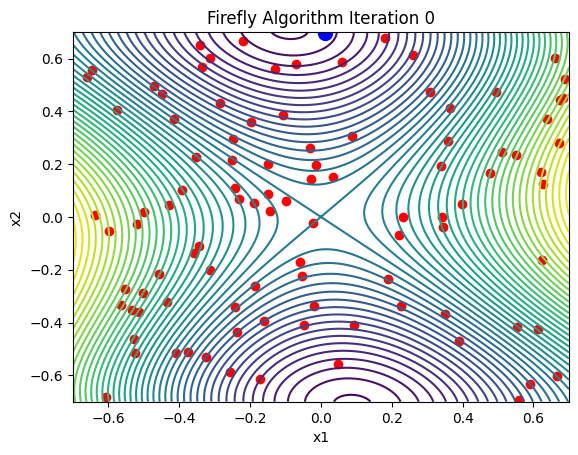

In [8]:
# Plot hasil running algoritma 1 secara interaktif
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = eval(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(history[0][:, 0], history[0][:, 1], c='red')

def update(frame):
    global best_firefly_index  # Access to the global best_firefly_index if needed
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    fireflies_this_frame = history[frame]
    ax.scatter(fireflies_this_frame[:, 0], fireflies_this_frame[:, 1], c='red')
    # Update the best position if necessary, here assumed to still be valid
    ax.scatter(fireflies_this_frame[best_firefly_index, 0], fireflies_this_frame[best_firefly_index, 1], c='blue', s=100)
    ax.set_title(f'Firefly Algorithm Iteration {frame}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
ani.save("firefly_1.gif", writer="pillow",fps=3)

#### Running algortima 2

Parameter yang digunakan hanya sebagai "Apple to Apple" kepada Firefly dan RAO3

In [9]:
# Run algoritma 2
n = 100  # Jumlah populasi
max_iter = 200 # Jumlah iterasi

final_pop, final_fitness, history, best, best_position, best_fitness = rao3_algorithm(max_iter, n)
print("Final population:", final_pop)
print("Final fitness values:", final_fitness)
print("Best position:", best_position)
print("Best fitness:",best_fitness)

Final population: [[-0.08801007  0.7       ]
 [-0.0882485   0.6999989 ]
 [-0.08770942  0.69999618]
 [-0.08843665  0.7       ]
 [-0.08874571  0.7       ]
 [-0.08729042  0.7       ]
 [-0.08744922  0.7       ]
 [-0.0889915   0.7       ]
 [-0.08755813  0.69998717]
 [-0.08740386  0.6999971 ]
 [-0.08828913  0.7       ]
 [-0.08800481  0.7       ]
 [-0.08804179  0.7       ]
 [-0.08858586  0.7       ]
 [-0.08652222  0.7       ]
 [-0.08788075  0.69999629]
 [-0.08771424  0.7       ]
 [-0.08803784  0.7       ]
 [-0.08802518  0.7       ]
 [-0.08982829  0.7       ]
 [-0.08725752  0.7       ]
 [-0.08785399  0.7       ]
 [-0.08858905  0.7       ]
 [-0.08817696  0.7       ]
 [-0.08777685  0.7       ]
 [-0.09208544  0.7       ]
 [-0.0876764   0.7       ]
 [-0.08824067  0.7       ]
 [-0.08739599  0.7       ]
 [-0.08785612  0.7       ]
 [-0.09026993  0.7       ]
 [-0.08837385  0.7       ]
 [-0.08912396  0.6999965 ]
 [-0.08866787  0.7       ]
 [-0.08817282  0.7       ]
 [-0.08785871  0.7       ]
 [-0.08814

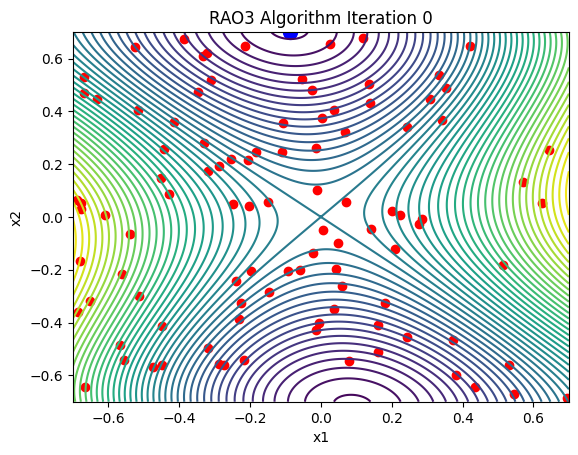

In [10]:
# Plot hasil running algoritma 2 secara interaktif
# Plot hasil dan animasi
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = eval(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(final_pop[:, 0], final_pop[:, 1], c='red')

def update(frame):
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    population_this_frame = history[frame]
    ax.scatter(population_this_frame[:, 0], population_this_frame[:, 1], c='red')
    # Update the best position if necessary, here assumed to still be valid
    ax.scatter(best[0], best[1], c='blue', s=100)
    ax.set_title(f'RAO3 Algorithm Iteration {frame}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
ani.save("rao3_1.gif", writer='pillow',fps=3)

#### Hasil dan Analisis
 
Analisis Perbandingan Algoritma RAO3 dan Firefly
1. Konvergensi Algoritma:

    - Firefly Algorithm: Algoritma ini menunjukkan kecenderungan yang baik dalam adaptasi terhadap kondisi optimal (best case) yang berubah-ubah karena memiliki mekanisme untuk terus mengejar titik optimal yang dinamis dalam ruang pencarian. Hal ini menyebabkan semua agen dalam populasi terus beradaptasi mengikuti best case terbaru di setiap iterasi.
    - RAO3: Tidak sefleksibel Firefly dalam hal dinamika perubahan best case. Ketika terdapat dua solusi yang hampir sama optimal, RAO3 bisa mengalami kesulitan karena algoritmanya tidak dirancang untuk menangani ambiguitas ini secara efektif, yang dapat menyebabkan pemecahan (splitting) dalam proses pencarian solusi.

2. Kecepatan Konvergensi:

    - Firefly Algorithm: Dapat mencapai konvergensi yang lebih cepat dengan parameter yang disetel secara optimal, seperti intensitas cahaya dan daya tarik, yang meningkatkan kecepatan adaptasi terhadap perubahan kondisi optimal.
    - RAO3: Memiliki kecepatan konvergensi yang cenderung lebih lambat karena minimnya parameter adaptasi. Ini membuat algoritma ini kurang fleksibel dibandingkan Firefly dalam menyesuaikan kecepatan pencarian berdasarkan dinamika solusi.

3. Keandalan dan Robustness:

    - Firefly Algorithm: Robust terhadap perubahan dinamis dalam landscape pencarian. Karena setiap agen secara independen menyesuaikan posisinya berdasarkan intensitas dan tarikan cahaya, ini memungkinkan pencarian yang lebih tersebar dan mengurangi risiko terjebak di local optima.
    - RAO3: Lebih rentan terhadap masalah ketika terdapat dualitas dalam best case scenario. Dalam kasus-kasus dimana terdapat beberapa solusi yang sama-sama baik, RAO3 bisa mengalami pembelahan fokus, yang menurunkan efisiensi keseluruhan pencarian.

4. Stabilitas Algoritma:

    - Firefly Algorithm: Meskipun adaptif, perubahan terus menerus dalam posisi agen berdasarkan best case yang dinamis dapat menyebabkan variabilitas yang tinggi dalam solusi yang dihasilkan dari iterasi ke iterasi.
    - RAO3: Memberikan hasil yang lebih stabil dari iterasi ke iterasi, meskipun mungkin tidak selalu mencapai solusi yang optimal jika kondisi berubah drastis selama proses optimasi.

#### Kesimpulan
Algoritma Firefly lebih unggul dalam fleksibilitas dan kecepatan adaptasi, namun RAO3 mungkin lebih disukai dalam situasi yang membutuhkan hasil yang stabil dan kurang variatif. Dalam aplikasi praktis, pilihan algoritma dapat dikondisikan berdasarkan kebutuhan spesifik dari problem yang dihadapi dan karakteristik landscape optimasi yang terlibat.